In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
import os
import pickle

In [5]:
#Словарь с неисправностей
fault_type_list = {
    1:"Нормальная работа",
    2:"Влияние газа",
    3:"Утечки в нагнетательной части",
    4:"Утечки в приемной части",
    5:"Обрыв/отворот",
    6:"АСПО",
    7:"Высокая посадка плунжера",
    8:"Низкая посадка плунжера",
    9:"Выход плунжера из цилиндра",
    10:"Прихват плунжера",
    11:"Заедание плунжера"}

# Определяем дискретизацию
discret = 50

In [6]:
fault_result = pd.read_csv('data/res.csv', delimiter = ';', index_col = 'id')
fault_result.describe()

,fault_type_id
count,407.000000
mean,5.115479
std,2.699924
min,1.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,10.000000


array([[<Axes: title={'center': 'fault_type_id'}>]], dtype=object)

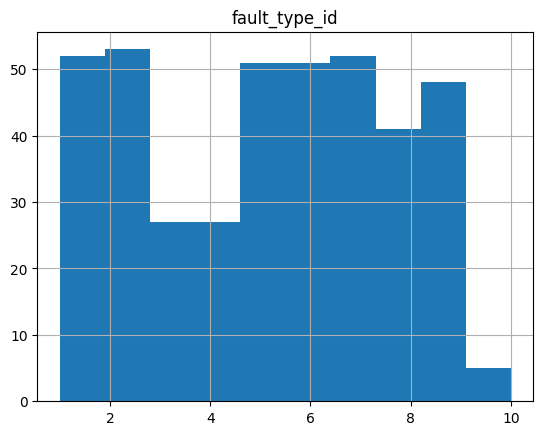

In [7]:
fault_result.hist()

In [8]:
df = pd.read_csv('data/dyno.csv', delimiter = ';', index_col = 'id')
df.head()

,x,y
id,,
1,0.0000,2.75
1,0.0000,2.80
1,0.0000,2.84
1,0.0089,2.87
1,0.0100,2.90


In [9]:
#Исследование данных

In [10]:
df.describe()

,x,y
count,452607.000000,452607.000000
mean,334.128667,1078.671043
std,724.897348,1735.330531
min,-0.010000,0.000000
25%,0.530000,2.740000
50%,1.500000,4.250000
75%,18.930029,2402.385000
max,3330.000000,7473.090000


In [11]:
#возьмем первую динамограмму для изучения
dyn = df.loc[1]
dyn.head()

,x,y
id,,
1,0.0000,2.75
1,0.0000,2.80
1,0.0000,2.84
1,0.0089,2.87
1,0.0100,2.90


<Axes: xlabel='x'>

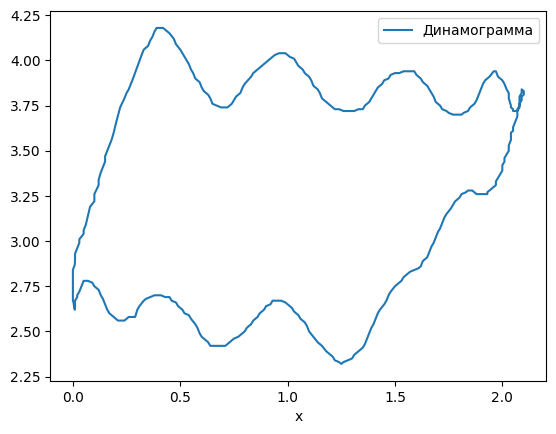

In [12]:
#посмотрим как выглядит динамограмма
dyn.plot('x', 'y', label = 'Динамограмма')

In [13]:
def dyn2normdyn(dyn, discret):
    '''
    Получение из динамограммы, нормализованной динамограммы с заданой дискретностью
    '''
    #Определяем максимальную и минимальную точки
    max_x = max(dyn.x)
    max_y = max(dyn.y)
    #формируем массив
    x_d = [int(dyn.x.iloc[k]*discret/max_x) for k in range(0,len(dyn.x))]
    y_d = [int(dyn.y.iloc[k]*discret/max_y) for k in range(0,len(dyn.y))]
    #Удаляем дубликаты в массиве нормализованной динамограммы
    dyn_norma = pd.DataFrame({'x':x_d,'y':y_d}).drop_duplicates(keep='first')
    return dyn_norma

<Axes: xlabel='x'>

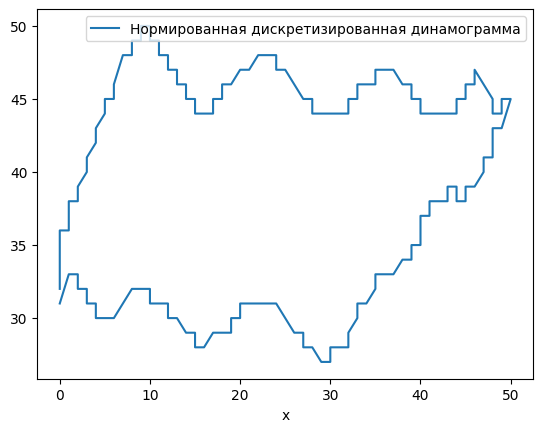

In [14]:
dyn_norma = dyn2normdyn(dyn, discret)
dyn_norma.plot('x', 'y', label = 'Нормированная дискретизированная динамограмма')

In [15]:
def save_img(dyn, path, img_name):
    if not os.path.exists(path):
        os.makedirs(path)
    fix, ax = plt.subplots()
    plt.axis('off')
    line = ax.plot(dyn.x, dyn.y)
    plt.savefig(path + '/' +img_name)
    plt.close()

In [16]:
#разобьем выборку на тренироваочную и тестовую 
x_train, x_test = train_test_split(fault_result.index, test_size=0.20)

In [17]:
#цикл по результатам ручной интерпритации
for i in fault_result.index:
    dyn = df.loc[i]
    subFolder = 'train' if i in x_train else 'test'
    save_img(dyn, f'img/dyn/{subFolder}/{str(fault_result.fault_type_id[i])}', f'{str(i)}.jpg')
    dyn_norma = dyn2normdyn(dyn, discret)
    save_img(dyn_norma, f'img/norm/{subFolder}/{str(fault_result.fault_type_id[i])}', f'{str(i)}.jpg')
    